In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [ ]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [ ]:
data.shape

(5268, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [ ]:
data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [ ]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
index = data.index
print(index)

RangeIndex(start=0, stop=5268, step=1)


In [ ]:
data['Time'] = data['Time'].apply(lambda x: x.strip('c:') if isinstance(x, str) else x)
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

In [ ]:
# Route analysis

In [ ]:
route_counts = data['Route'].value_counts()
print("Top 10 Routes with Incident Counts:")
print(route_counts.head(10))

Top 10 Routes with Incident Counts:
Training                      81
Sightseeing                   29
Test flight                   17
Test                           6
Sao Paulo - Rio de Janeiro     5
Bogota - Barranquilla          4
Villavicencio - Mitu           4
Sao Paulo - Porto Alegre       4
Saigon - Paris                 4
Guayaquil - Quito              3
Name: Route, dtype: int64


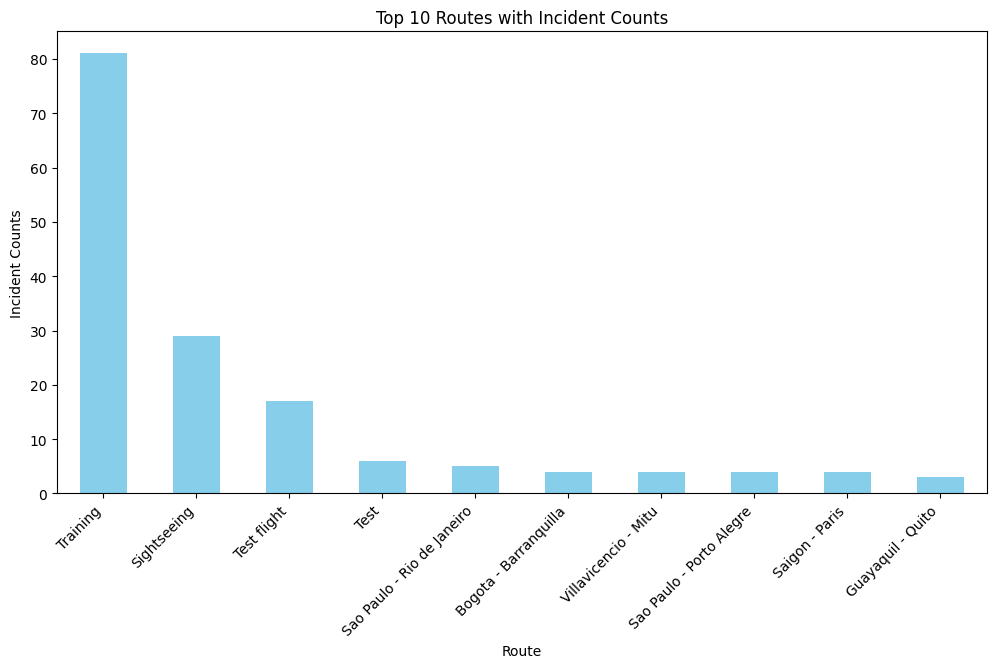

In [ ]:
route_counts = data['Route'].value_counts().head(10)

# Plotting the top 10 routes with incident counts
plt.figure(figsize=(12, 6))
route_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Routes with Incident Counts')
plt.xlabel('Route')
plt.ylabel('Incident Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
average_fatalities = data['Fatalities'].mean()
print("Average number of fatalities:", average_fatalities)

Average number of fatalities: 20.06830289193303


In [ ]:
severity_by_route = data.groupby('Route')['Fatalities'].sum()
threshold = 20
high_fatality_routes = severity_by_route[severity_by_route > threshold]
print("Routes with High Fatalities:")
print(high_fatality_routes)

Routes with High Fatalities:
Route
Abadan - Tehran                                              27.0
Abakan - Petropavlosk - Kamchatsky                           23.0
Abidjan - Lagos                                             169.0
Abidjan - Rio de Janeiro                                     50.0
Abidjan, Ivory Coast - Douala, Cameroon - Nairobi, Kenya    114.0
                                                            ...  
Zahedan - Kerman                                            275.0
Zumba - Loja                                                 44.0
Zurich - Geneva                                              80.0
Zurich - Rabat                                               72.0
Zurich - Tel Aviv                                            47.0
Name: Fatalities, Length: 1116, dtype: float64


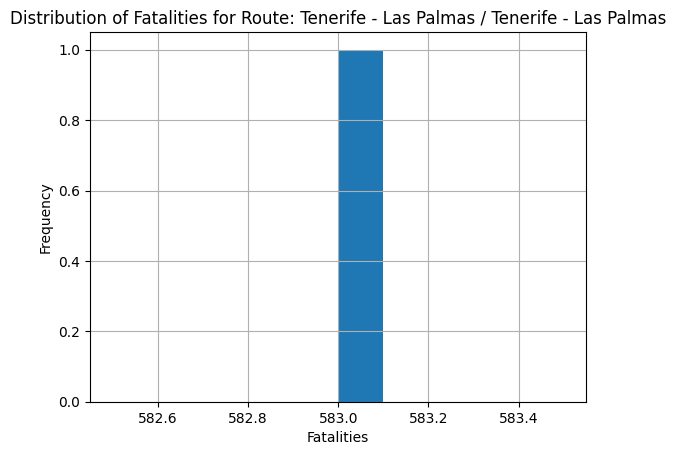

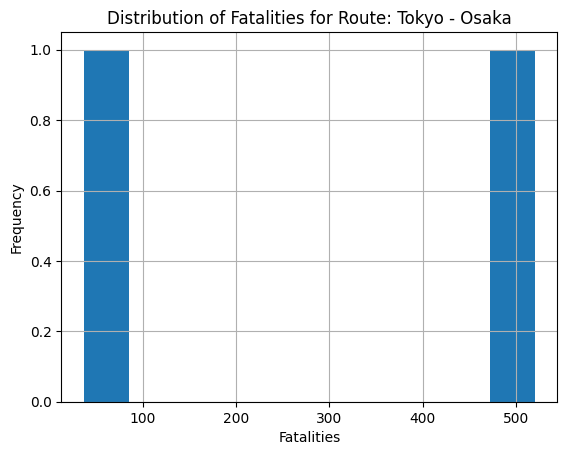

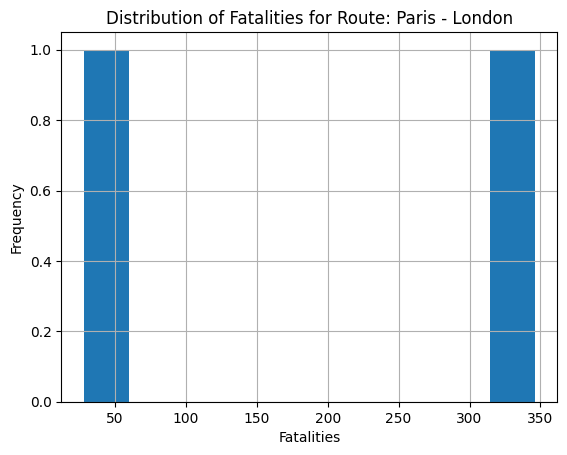

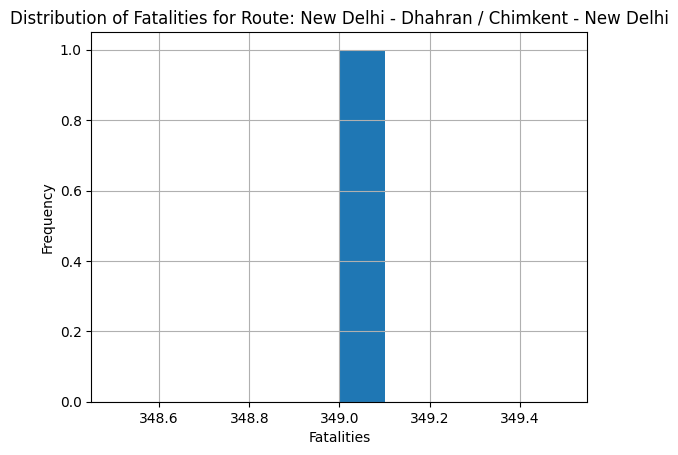

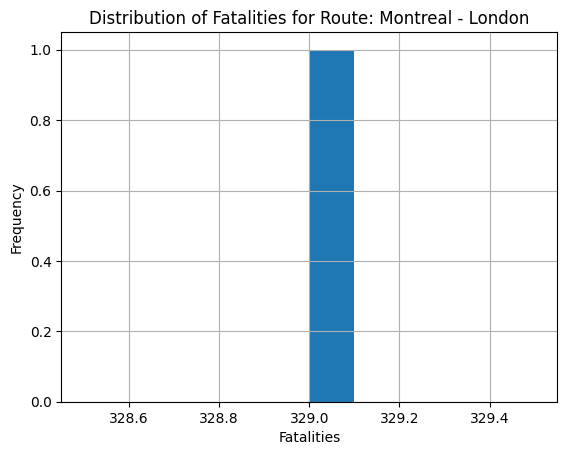

In [ ]:
threshold = 20
filtered_data = data[data['Fatalities'] > threshold]
routes_grouped = filtered_data.groupby('Route')['Fatalities'].sum().nlargest(n=5)

for i, (route, fatalities) in enumerate(routes_grouped.items()):
    plt.figure(i + 1)
    filtered_data[filtered_data['Route'] == route]['Fatalities'].hist()
    plt.title(f'Distribution of Fatalities for Route: {route}')
    plt.xlabel('Fatalities')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
data['Year'] = data['Date'].dt.year
temporal_trends_by_route = data.groupby(['Year', 'Route']).size().unstack(fill_value=0)
print(temporal_trends_by_route)

Route   - Tegucigalpa - Toncontin  AZ - Las Vegas, NV  Abaco - Miami  \
Year                                                                   
1908                            0                   0              0   
1912                            0                   0              0   
1921                            0                   0              0   
1923                            0                   0              0   
1924                            0                   0              0   
...                           ...                 ...            ...   
2005                            0                   0              0   
2006                            0                   0              0   
2007                            0                   0              0   
2008                            0                   0              0   
2009                            0                   0              0   

Route  Abadan - Tehran  Abakan - Petropavlosk - Kamchatsky  Abi

In [ ]:
aircraft_by_route = data.groupby('Route')['Type'].value_counts().unstack(fill_value=0)
print(aircraft_by_route)

Type                                AAC-1 Toucan  ATR 42-300  ATR-42-300  \
Route                                                                      
 - Tegucigalpa - Toncontin                     0           0           0   
AZ - Las Vegas, NV                             0           0           0   
Abaco - Miami                                  0           0           0   
Abadan - Tehran                                0           0           0   
Abakan - Petropavlosk - Kamchatsky             0           0           0   
...                                          ...         ...         ...   
Zurich - Rabat                                 0           0           0   
Zurich - Rome                                  0           0           0   
Zurich - Tel Aviv                              0           0           0   
Zürich - Dresden                               0           0           0   
al-Asad air base - Baghdad                     0           0           0   

Type       

In [ ]:
data_filtered = data[['Route', 'Type', 'Fatalities']].dropna(subset=['Route', 'Type'])
fatalities_by_route_type = data_filtered.groupby(['Route', 'Type'])['Fatalities'].sum().reset_index()
pd.set_option('display.max_rows', None)
print(fatalities_by_route_type)
pd.reset_option('display.max_rows')

                                                  Route  \
0                             - Tegucigalpa - Toncontin   
1                                    AZ - Las Vegas, NV   
2                                         Abaco - Miami   
3                                       Abadan - Tehran   
4                    Abakan - Petropavlosk - Kamchatsky   
5                                       Abidjan - Lagos   
6                              Abidjan - Rio de Janeiro   
7                               Abidjan - Rundu, Nambia   
8     Abidjan, Ivory Coast - Douala, Cameroon - Nair...   
9                         Abilene, TX - Forth Worth, TX   
10                                  Abu Dhabi - Bangkok   
11                           Abuja - Jos - Kano - Lagos   
12                                        Abuja - Obudu   
13                                Abuja - Port Harcourt   
14                               Acapulco - Guadalajara   
15                                    Acapulco - Oaxaca 

In [ ]:
data_filtered = data[['Route', 'Type', 'Fatalities']].dropna(subset=['Route', 'Type'])
fatalities_by_route_type = data_filtered.groupby(['Route', 'Type'])['Fatalities'].sum().reset_index()
pd.set_option('display.max_rows', None)
print(fatalities_by_route_type)
fatalities_by_route_type.info()
summary_statistics = fatalities_by_route_type.describe()
print("\nSummary Statistics:")
print(summary_statistics)
pd.reset_option('display.max_rows')

                                                  Route  \
0                             - Tegucigalpa - Toncontin   
1                                    AZ - Las Vegas, NV   
2                                         Abaco - Miami   
3                                       Abadan - Tehran   
4                    Abakan - Petropavlosk - Kamchatsky   
5                                       Abidjan - Lagos   
6                              Abidjan - Rio de Janeiro   
7                               Abidjan - Rundu, Nambia   
8     Abidjan, Ivory Coast - Douala, Cameroon - Nair...   
9                         Abilene, TX - Forth Worth, TX   
10                                  Abu Dhabi - Bangkok   
11                           Abuja - Jos - Kano - Lagos   
12                                        Abuja - Obudu   
13                                Abuja - Port Harcourt   
14                               Acapulco - Guadalajara   
15                                    Acapulco - Oaxaca 

In [ ]:
data_filtered = data[['Route', 'Type', 'Fatalities']].dropna(subset=['Route', 'Type'])
summary_statistics = data_filtered.groupby(['Route', 'Type'])['Fatalities'].describe()
print(summary_statistics)

                                                           count  mean  std  \
Route                              Type                                       
 - Tegucigalpa - Toncontin         Douglas DC-6              1.0  10.0  NaN   
AZ - Las Vegas, NV                 Piper PA-31-350 Navajo    1.0   8.0  NaN   
Abaco - Miami                      Cessna 402B               1.0   9.0  NaN   
Abadan - Tehran                    Douglas DC-3              1.0  27.0  NaN   
Abakan - Petropavlosk - Kamchatsky Ilyushin IL-76MD          1.0  23.0  NaN   
...                                                          ...   ...  ...   
Zurich - Rabat                     Ilyushin IL-18B           1.0  72.0  NaN   
Zurich - Rome                      Douglas DC-4              1.0   6.0  NaN   
Zurich - Tel Aviv                  Convair CV-990-30A-6      1.0  47.0  NaN   
Zürich - Dresden                   Saab 340B                 1.0  10.0  NaN   
al-Asad air base - Baghdad         Antonov An-12    

              Aboard  Fatalities    Ground      Year
Aboard      1.000000    0.757172  0.023241  0.156472
Fatalities  0.757172    1.000000  0.035170  0.109586
Ground      0.023241    0.035170  1.000000  0.029193
Year        0.156472    0.109586  0.029193  1.000000


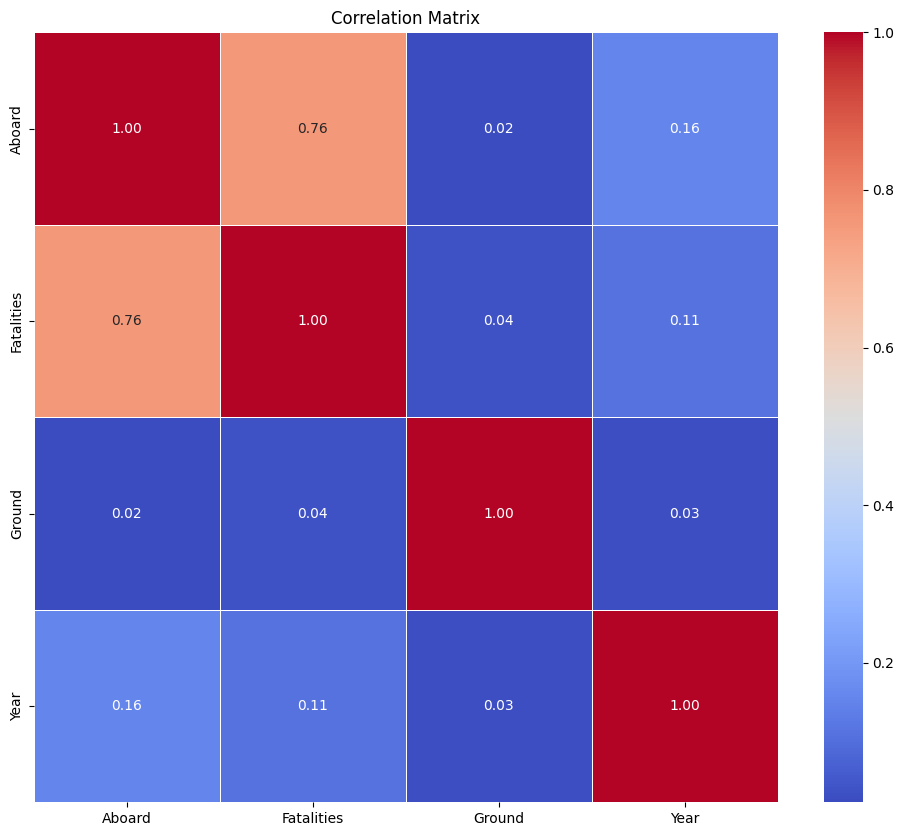

In [ ]:
selected_columns = ['Aboard', 'Fatalities', 'Ground', 'Year']
correlation_matrix = data[selected_columns].corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

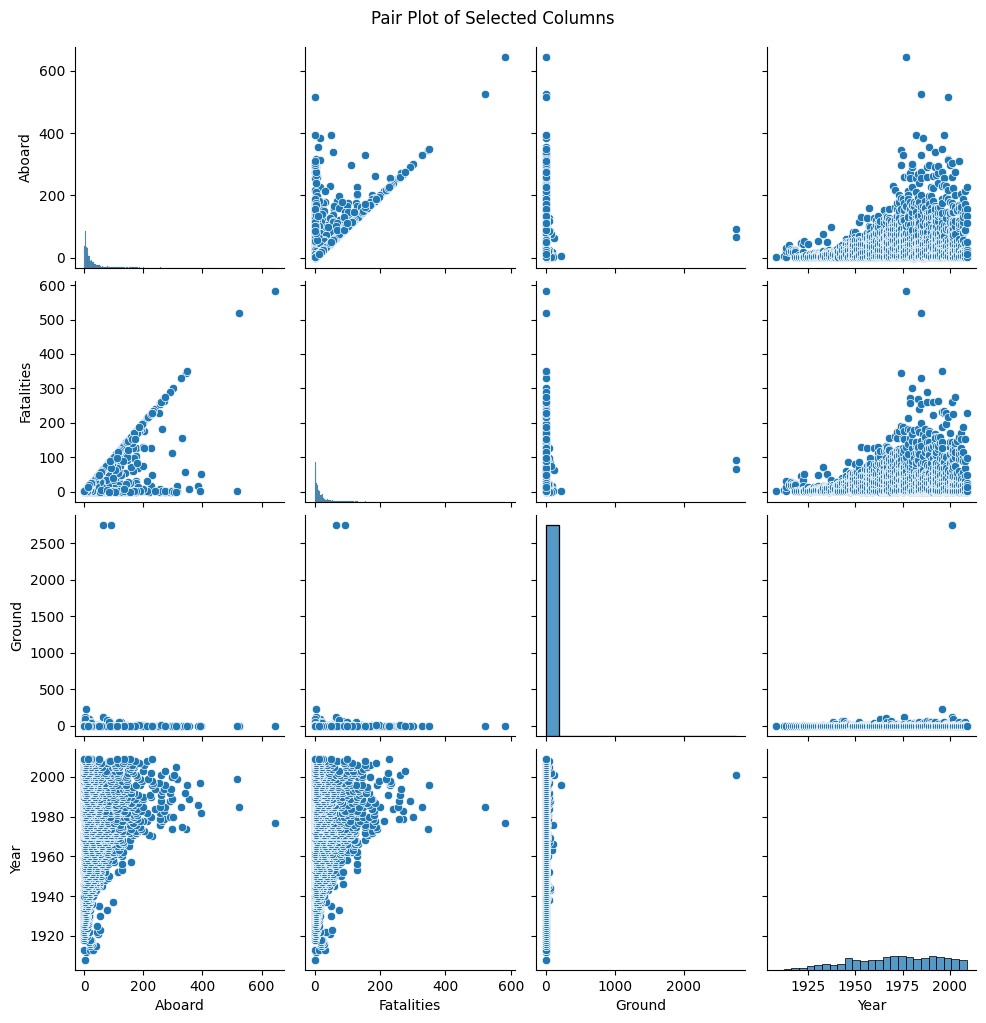

In [ ]:
selected_columns = ['Aboard', 'Fatalities', 'Ground', 'Year']
pairplot_data = data[selected_columns]


sns.pairplot(pairplot_data)
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()


1) Year and Fatalities: Weak negative correlations for both onboard and ground fatalities, suggesting a decrease in aviation fatalities over time.

2) Onboard and Ground Fatalities: Weak positive correlation, implying an increase in one category often leads to a rise in the other.

3) Onboard and Total Fatalities: Strong positive correlation, highlighting the significant contribution of onboard fatalities to the overall death toll.

4) Correlation Matrix: Strongest correlations involve onboard fatalities and year/total fatalities, emphasizing their importance in analyzing routes.